# Load data

In [ ]:
import pandas as pd
import numpy as np
%pylab inline

In [69]:
data = pd.read_csv('data.csv')
data.head(2)

,age,female,flu_season,ed_admit,severity score,comorbidity score,readmit30
0,100,1,1,1,38,112,0
1,83,1,0,1,8,109,1


In [6]:
data.isnull().sum()

age                  0
female               0
flu_season           0
ed_admit             0
severity score       0
comorbidity score    0
readmit30            0
dtype: int64

In [7]:
data.columns = [column.replace(' ','_') for column in data.columns]

In [6]:
data.head(5)

,age,female,flu_season,ed_admit,severity_score,comorbidity_score,readmit30
0,100,1,1,1,38,112,0
1,83,1,0,1,8,109,1
2,74,0,1,0,1,80,0
3,66,1,1,1,25,4,0
4,68,1,1,1,25,32,0


In [7]:
#Baseline
data.readmit30.mean()

0.22774988589685075

In [8]:
# count number per segment
data['readmit30'].value_counts()

0    3384
1     998
Name: readmit30, dtype: int64

# Fit Classifiers

In [11]:
%pylab inline

import seaborn as sns
from collections import Counter
from collections import defaultdict
from confusion_mat import show_confusion_matrix


# Evaluation - Optimization Tools
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,confusion_matrix, classification_report
from sklearn.preprocessing import normalize, scale, StandardScaler, Normalizer
from sklearn.grid_search import GridSearchCV

# Classification Algorithms
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier

Populating the interactive namespace from numpy and matplotlib


/Users/Charlotte/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Charlotte/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [12]:
data.head(5)

,age,female,flu_season,ed_admit,severity_score,comorbidity_score,readmit30
0,100,1,1,1,38,112,0
1,83,1,0,1,8,109,1
2,74,0,1,0,1,80,0
3,66,1,1,1,25,4,0
4,68,1,1,1,25,32,0


In [13]:
X_original = data.drop('readmit30',axis = 1)
y_original= data.readmit30
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original,y_original,test_size=0.2)
# scale = StandardScaler()
# X_train_original = scale.fit_transform(X_train_original)
# X_test_original= scale.fit_transform(X_test_original)


In [14]:
def cross_val(models,X_train,y_train):
    for model in models:
        model.fit(X_train,y_train)
        
        print(str(model).split('(')[0],'CV:')
        print('-- Accuracy:', round((cross_val_score(model, X_train, y_train, cv=5,scoring='accuracy').mean()), 3),
              '| Recall:', round(cross_val_score(model, X_train, y_train, cv=5, scoring='recall').mean(), 3),
              '| Precision:', round(cross_val_score(model, X_train, y_train, cv=5, scoring='precision').mean(), 3),
              '| f1:', round(cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean(), 3),
             '| auc:',round(cross_val_score(model, X_train, y_train, cv=5, scoring= 'roc_auc').mean(), 3))

In [15]:
clf = [RandomForestClassifier(),GradientBoostingClassifier(),
      SVC(),AdaBoostClassifier(),LogisticRegression()]

In [16]:
cross_val(clf,X_train_original,y_train_original)

RandomForestClassifier CV:
-- Accuracy: 0.771 | Recall: 0.29 | Precision: 0.516 | f1: 0.368 | auc: 0.706
GradientBoostingClassifier CV:
-- Accuracy: 0.8 | Recall: 0.306 | Precision: 0.622 | f1: 0.408 | auc: 0.765
SVC CV:
-- Accuracy: 0.772 | Recall: 0.015 | Precision: 0.438 | f1: 0.029 | auc: 0.648
AdaBoostClassifier CV:
-- Accuracy: 0.802 | Recall: 0.314 | Precision: 0.629 | f1: 0.416 | auc: 0.765
LogisticRegression CV:
-- Accuracy: 0.805 | Recall: 0.31 | Precision: 0.644 | f1: 0.417 | auc: 0.779


# LogisticRegression &  GradientBoostingClassifier are chosen basing on high score on recall and precision

In [17]:
def gs_logit(X_train,y_train):

    param =  [{'penalty': ["l1","l2"],'C': [0.2,0.5,1]}]
    grid_search = GridSearchCV(LogisticRegression(), param_grid = param, verbose = 3, cv = 5,n_jobs= -1, scoring = 'recall')
    grid_search.fit(X_train, y_train)
    output =  [grid_search.best_score_,grid_search.best_params_]
    
    return output

In [18]:
logit_output = gs_logit(X_train_original,y_train_original)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.2, penalty=l1 ...............................................
[CV] C=0.2, penalty=l1 ...............................................
[CV] C=0.2, penalty=l1 ...............................................
[CV] C=0.2, penalty=l1 ...............................................
[CV] ...................... C=0.2, penalty=l1, score=0.301887 -   0.1s
[CV] C=0.2, penalty=l1 ...............................................
[CV] ...................... C=0.2, penalty=l1, score=0.352201 -   0.2s
[CV] ...................... C=0.2, penalty=l1, score=0.289308 -   0.2s
[CV] C=0.2, penalty=l2 ...............................................
[CV] ...................... C=0.2, penalty=l1, score=0.327044 -   0.2s
[CV] C=0.2, penalty=l2 ...............................................
[CV] C=0.2, penalty=l2 ...............................................
[CV] ...................... C=0.2, penalty=l2, score=0.314465 -   0.0s
[CV] ............

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.9s finished


In [19]:
logit_output

[0.30979733593359693, {'C': 1, 'penalty': 'l2'}]

In [20]:
def gs_gb(X_train,y_train):

    param =  [{'learning_rate': [0.1,0.5], 'n_estimators' : [500,600],
               "max_depth": [5,10,12], 'max_features': [2,4,6]}]
    grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid = param, verbose = 3, cv = 5,n_jobs= -1, scoring = 'recall')
    grid_search.fit(X_train, y_train)
    output =  [grid_search.best_score_,grid_search.best_params_]
    
    return output

In [22]:
gb_output = gs_gb(X_train_original,y_train_original)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=5, max_features=2, learning_rate=0.1, n_estimators=500 
[CV] max_depth=5, max_features=2, learning_rate=0.1, n_estimators=500 
[CV] max_depth=5, max_features=2, learning_rate=0.1, n_estimators=500 
[CV] max_depth=5, max_features=2, learning_rate=0.1, n_estimators=500 
[CV]  max_depth=5, max_features=2, learning_rate=0.1, n_estimators=500, score=0.371069 -   2.5s
[CV]  max_depth=5, max_features=2, learning_rate=0.1, n_estimators=500, score=0.352201 -   2.5s
[CV] max_depth=5, max_features=2, learning_rate=0.1, n_estimators=600 
[CV] max_depth=5, max_features=2, learning_rate=0.1, n_estimators=500 
[CV]  max_depth=5, max_features=2, learning_rate=0.1, n_estimators=500, score=0.283019 -   2.6s
[CV]  max_depth=5, max_features=2, learning_rate=0.1, n_estimators=500, score=0.358491 -   2.6s
[CV] max_depth=5, max_features=2, learning_rate=0.1, n_estimators=600 
[CV] max_depth=5, max_features=2, learning_rate=0.1, n_es

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.5s


[CV]  max_depth=5, max_features=6, learning_rate=0.1, n_estimators=500, score=0.303797 -   3.1s
[CV] max_depth=5, max_features=6, learning_rate=0.1, n_estimators=600 
[CV]  max_depth=5, max_features=6, learning_rate=0.1, n_estimators=600, score=0.402516 -   3.9s
[CV] max_depth=5, max_features=6, learning_rate=0.1, n_estimators=600 
[CV]  max_depth=5, max_features=6, learning_rate=0.1, n_estimators=600, score=0.377358 -   3.7s
[CV] max_depth=10, max_features=2, learning_rate=0.1, n_estimators=500 
[CV]  max_depth=5, max_features=6, learning_rate=0.1, n_estimators=600, score=0.345912 -   3.8s
[CV] max_depth=10, max_features=2, learning_rate=0.1, n_estimators=500 
[CV]  max_depth=5, max_features=6, learning_rate=0.1, n_estimators=600, score=0.327044 -   3.5s
[CV] max_depth=10, max_features=2, learning_rate=0.1, n_estimators=500 
[CV]  max_depth=5, max_features=6, learning_rate=0.1, n_estimators=600, score=0.297468 -   3.5s
[CV] max_depth=10, max_features=2, learning_rate=0.1, n_estimators

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.1min


[CV]  max_depth=10, max_features=2, learning_rate=0.5, n_estimators=500, score=0.364780 -   5.4s
[CV] max_depth=10, max_features=2, learning_rate=0.5, n_estimators=500 
[CV]  max_depth=10, max_features=2, learning_rate=0.5, n_estimators=500, score=0.333333 -   4.4s
[CV] max_depth=10, max_features=2, learning_rate=0.5, n_estimators=600 
[CV]  max_depth=10, max_features=2, learning_rate=0.5, n_estimators=500, score=0.339623 -   4.5s
[CV] max_depth=10, max_features=2, learning_rate=0.5, n_estimators=600 
[CV]  max_depth=10, max_features=2, learning_rate=0.5, n_estimators=500, score=0.314465 -   2.8s
[CV] max_depth=10, max_features=2, learning_rate=0.5, n_estimators=600 
[CV]  max_depth=10, max_features=2, learning_rate=0.5, n_estimators=500, score=0.310127 -   3.7s
[CV] max_depth=10, max_features=2, learning_rate=0.5, n_estimators=600 
[CV]  max_depth=10, max_features=2, learning_rate=0.5, n_estimators=600, score=0.276730 -   2.6s
[CV] max_depth=10, max_features=2, learning_rate=0.5, n_es

[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.9min finished


In [23]:
gb_output

[0.3551229202632381,
 {'learning_rate': 0.5,
  'max_depth': 5,
  'max_features': 6,
  'n_estimators': 500}]

# Gradient Boosting Classifier

In [41]:
def fit_model(model,features,X_train,y_train,X_test,y_test):
    "Fit Model --- Return Evaluation Metrics"
    
    model = model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    prob = model.predict_proba(X_test)
    
    print(str(model).split('(')[0],':')
    print('Train | Accuracy:', round(accuracy_score(y_train, train_pred),3),
          '| Recall',round(recall_score(y_train, train_pred),3),
          '| Precision',round(precision_score(y_train, train_pred),3),
          '| f1',round(f1_score(y_train, train_pred),3))

    print('Test | Accuracy:', round(accuracy_score(y_test, test_pred),3),
          '| Recall',round(recall_score(y_test, test_pred),3),
          '| Precision',round(precision_score(y_test, test_pred),3),
          '| f1',round(f1_score(y_test, test_pred),3))
#     if model == "ada":
    feature_importances = model.feature_importances_
    feature_indices = np.argsort(feature_importances)[::-1]
    print(' ')
    print('Features Importance Order')
    for f,index in enumerate(feature_indices):
        print("%2d) %-*s %f" % (f + 1, 30,features[index], feature_importances[index]))
    return test_pred, prob[:,1]

In [25]:
def plot_roc(y_test, pred_test):
    fpr, tpr, _= roc_curve(y_test, pred_test)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr, label = 'area %.2f' %roc_auc)
    plt.plot(np.linspace(0,1,10),np.linspace(0,1,10))
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.legend(loc = 'lower right')
    plt.show()

In [26]:
logit = LogisticRegression(C = 1, penalty = 'l2')

In [27]:
gradboost = GradientBoostingClassifier(learning_rate= 0.5, n_estimators = 500, \
                                       max_features = 6, max_depth = 5)

In [28]:
features = data.columns.tolist()
features.remove('readmit30')

# Results

In [42]:
gradboost_pred,gradboost_prob = fit_model(gradboost,features,X_train_original,y_train_original,X_test_original,y_test_original) #2:10

GradientBoostingClassifier :
Train | Accuracy: 0.999 | Recall 0.997 | Precision 0.999 | f1 0.998
Test | Accuracy: 0.751 | Recall 0.412 | Precision 0.462 | f1 0.435
 
Features Importance Order
 1) comorbidity_score              0.367300
 2) severity_score                 0.285188
 3) age                            0.239973
 4) female                         0.045196
 5) flu_season                     0.043148
 6) ed_admit                       0.019195


In [30]:
logit_pred, logit_prob = fit_model(logit,features,X_train_original,y_train_original,X_test_original,y_test_original) #2:10

LogisticRegression :
Train | Accuracy: 0.806 | Recall 0.312 | Precision 0.651 | f1 0.422
Test | Accuracy: 0.805 | Recall 0.314 | Precision 0.674 | f1 0.428


In [31]:
gradboost_confusion = confusion_matrix(y_test_original, gradboost_pred )
logit_confusion  = confusion_matrix(y_test_original, logit_pred )

# Confusion Matrix

# Logistic Regression

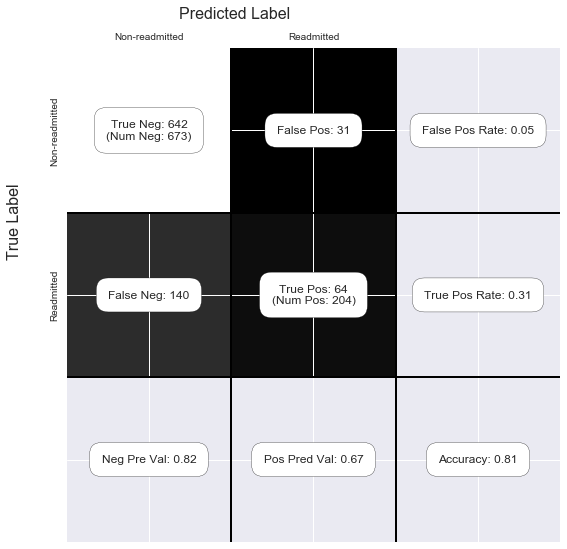

In [55]:
show_confusion_matrix(logit_confusion,class_labels=["Non-readmitted", "Readmitted"])

# Gradient Boost Classifier

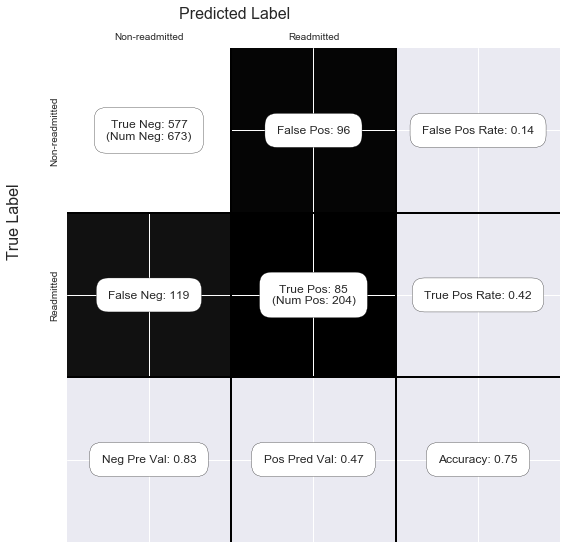

In [54]:
show_confusion_matrix(gradboost_confusion,class_labels=["Non-readmitted", "Readmitted"])

The winner is Gradient Boosting which has a higher recall rate ( which means lower false negative ). In this case, the readmitted patients that we false to detect will cause the hospital to break the readmission limit rate and costs higher penalties. Therefore, instead of accuracy score, we use recall rate to evaluate each algorithms.

# Calculate Cost and Benefits of the presense of CareTracker

Without caretracker, if the hospital applies Logistic Regression Classier in its system, the chance 

In [53]:
# false negative - number of readmitted patients that the model missed 
# recall rate: 0.41 - be able to detect 40% of readmitted patients 
without_caretracker =(0.59 * 998 ) * 8000
print("Without caretracker, it costs $",without_caretracker)

Without caretracker, it costs $ 4710559.999999999


In [54]:
#caretracker patients : recall rate x number of readmitted patients
caretracker_patients = (0.41 * 998) 
caretracker_patients

409.17999999999995

In [55]:
caretracker_cost = (caretracker_patients * 1200) 
caretracker_penalty = (((caretracker_patients * 0.6) +(998 * 0.6)) * 8000 )
caretracker_total_cost = caretracker_cost + caretracker_penalty
print("With caretracker, it costs $",caretracker_total_cost)

With caretracker, it costs $ 7245479.999999999


In [56]:
print("The maximum penalty cost until implementing care tracker would save more money:",\
      round((without_caretracker - caretracker_cost )/(caretracker_penalty),2))

The maximum penalty cost until implementing care tracker would save more money: 0.62


In [63]:
readmitted_patients = arange(200,1400,200)
without_caretracker = [i * 0.59 * 8000 for i in readmitted_patients]
caretracker_penalty = arange(0,12000,2000) 
caretracker_fee = [1200]* 6
with_caretracker = (readmitted_patients * 0.4 * caretracker_fee) + (((readmitted_patients * 0.6 )+ (readmitted_patients*0.4*0.6))*caretracker_penalty)

In [68]:
pd.DataFrame(np.stack((caretracker_penalty,readmitted_patients),axis = -1), columns = ['penalty','n_readmitted'])

,penalty,n_readmitted
0,0,200
1,2000,400
2,4000,600
3,6000,800
4,8000,1000
5,10000,1200


In [49]:
cost_of_rap = pd.DataFrame(np.stack((without_caretracker,with_caretracker),axis = -1)\
                           ,columns =['Model only','Model-CareTracker'])
cost_of_rap.index = arange(200,1400,200).tolist()
cost_of_rap = cost_of_rap/1000000
cost_of_rap

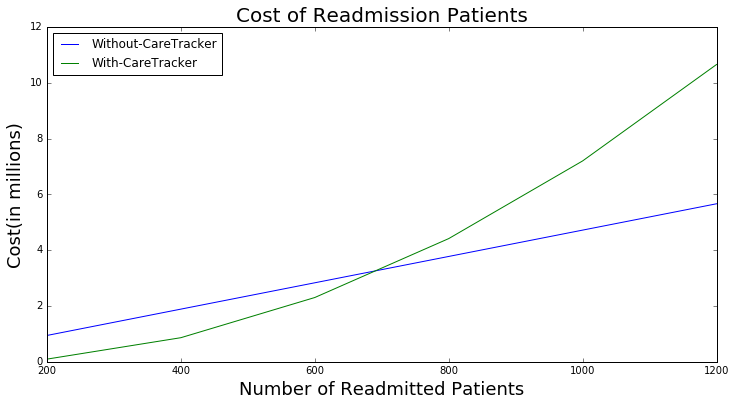

In [50]:
cost_of_rap.plot(figsize=(12, 6))
plt.title("Cost of Readmission Patients", fontsize=20)
plt.xlabel('Number of Readmitted Patients', fontsize=18)
plt.ylabel('Cost(in millions)', fontsize=18)

# Conclusion
** If the number of readmitted patients exceeds 700 people, we should consider without caretracker, since we have to pay fees for all the patients we predicted to be readmitted. Even after being enrolled in the program, 60% of them will be readmitted, which we will suffer the penalty for, and in addition of the cost of 60% of false negative rate, readmitted patients that we mislabeled. **


**Assumption**: 

**"With CareTracker"**,I give no penalty if number of readmitted patients are below 200. For an increase of 200 readmitted patients, the cost of penalty/readmitted patient is increased by 2000.

**"Without CareTracker"**: To be conservative, I used the penalty of $8000 per readmitted patients. So if we manage to reduce the number of readmitted patients, then the extra will be savings.



# Future Work

With more data to feed into  classifiers, we expect to improve our recall rate.
This leads to early detection of readmitted patients, in which we keep them longer for more tests/treatments and potentially reduce readmission rate. 

Further analysis on the cost of CareTracker program and the cost of follow-up and/or keeping the patients for more labs and checkup.


Update the penalty for different number of readmitted patients.

